# 1. 文件操作

## 1.1. 文件的作用？
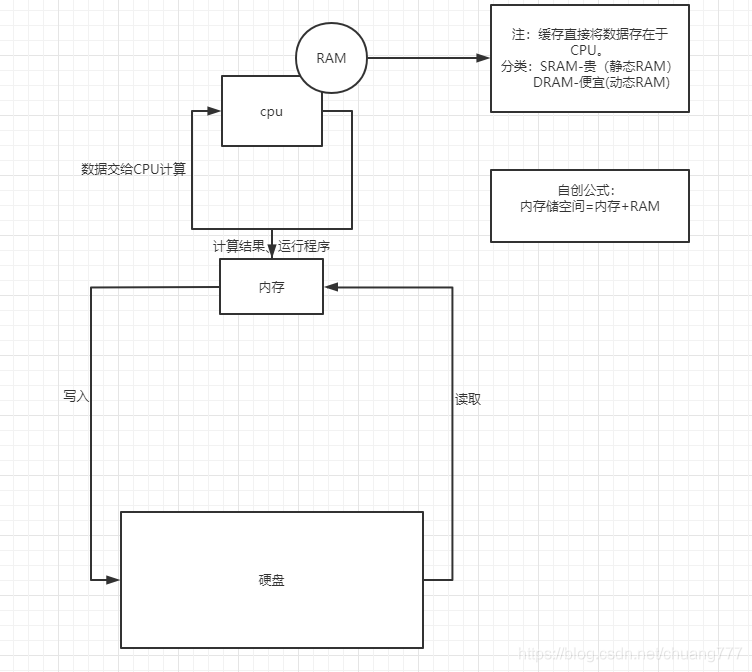
永久存储

## 1.2. 文件的打开 open
文档参考：https://docs.python.org/zh-cn/3/library/functions.html?highlight=open#open

open函数的常用形式
```python
f = open(file, mode='r', encoding=None)
```
* file: 必需，文件路径
* mode: 可选，文件打开模式
* encoding: 编码方式

|mode | 说明 |
| :--: | :--: |
| r | 以只读方式打开文件。这是默认模式。|
| w	|打开一个文件只用于写入。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件|
| rb | 以二进制格式打开一个文件用于只读|
| wb | 以二进制格式打开一个文件只用于写入。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件|

## 1.3. 文件的关闭 close
```python
f.close()
```

## 1.4. 示例

In [ ]:
file_name = '1.txt'
encoding = 'utf-8'

### 写入

In [ ]:
f = open(file_name, 'w', encoding=encoding)
f.write('hello world!')
f.write("\n")
f.write("From Python")
f.close()

### 读取

In [ ]:
# read
f = open(file_name, 'r', encoding=encoding)
data = f.read()
print(data)
f.close()

In [ ]:
# readlines
f = open(file_name, 'r', encoding=encoding)
data = f.readlines()
print(data)
f.close()

In [ ]:
# readline
f = open(file_name, 'r', encoding=encoding)
data = f.readline()
print("1: ", data)
data = f.readline()
print("2: ", data)
data = f.readline()
print("3: ", data)
data = f.readline()
print("4: ", data)
f.close()

## 1.5. 进化

### with 语法糖
每次需要手动关闭，文件对象，一方面写的时候太麻烦，另一方面可能会遗忘

因此出现了with语句，会自动进行关闭和清理操作

In [ ]:
with open(file_name, 'r', encoding=encoding) as f:
    data = f.read()
    print(data)

In [ ]:
class File:
    def __init__(self, file_name):
        self.file_name = file_name
        print("__init__")
        
    def __enter__(self):
        print('__enter__')
        return self
    
    def read(self):
        print("read", self.file_name)
        
    def __exit__(self, exc_type, exc_value, traceback):
        print("__exit__")
        

with File('1.txt') as my_f:
    my_f.read()

### 编码 与 解码

什么是计算机内的编码？

编码是 `你好` -> 001001001001

解码是 001001001001 -> `你好`

---


简单来说，是一种约定俗成。

比如中国的方言：老婆在全国有一百多种叫法，武汉叫“堂客”，安庆叫“烧锅的”。
由于表达的是同一个东西，所以一个权威机构出面，统一叫老婆

---

计算机层面也是如此，计算机内部只用0和1表示，通过不同的组合代表不同的意思

假设有个字符集叫XXX：
|二进制|意思|
|:--:| :--: |
| 001 | 你 |
| 002 | 好 |
| ... | ... |

字符集 YYY：
|二进制|意思|
|:--:| :--: |
| 001 | 已 |
| 002 | 存 |
| ... | ... |


小红发送消息给张三，小红的字符集是XXX，张三的字符集是YYY

---

小红 -> `你好` => 字符集XXX编码 => `001002` =====网络传输===== `001002` => 字符集YYY解码 => `已存` -> 张三 (・_・?)

---

目前比较常用的字符集是: `GBK` 和 `utf-8`

# 2. OS模块

In [ ]:
with open('os.txt', 'w', encoding=encoding) as f:
    f.write("123")

## 2.1. 文件重命名

In [ ]:
import os
os.rename("1.txt", "2.txt")

## 2.2. 删除文件

In [ ]:
import os
os.remove("2.txt")

## 2.3. 创建文件夹

In [ ]:
import os
os.mkdir("张三")

## 2.4. 获取当前目录

In [ ]:
import os
os.getcwd()

## 2.5. 获取目录列表

In [ ]:
import os
os.listdir("./")

## 2.6. 删除文件夹

In [ ]:
import os
os.rmdir("张三")

# 3. 内置函数

## 3.1. id() 获取内存地址

In [ ]:
id(1)

## 3.2. range() 
基础语法：`range(start, stop[, step])`

In [ ]:
range(10)

In [ ]:
list(range(10))

In [ ]:
list(range(0, 10, 2))

## 3.3. max() min() len() sum()

In [ ]:
lst = [1, 10, -2]

In [ ]:
max(lst)

In [ ]:
min(lst)

In [ ]:
len(lst)

In [ ]:
sum(lst)

## 3.4. map()  作用与每个元素，返回新列表

In [ ]:
lst = [1, 10, -2]

In [ ]:
def func(tmp):
    return tmp * 2

In [ ]:
list(map(func, lst))

## 3.5. all() 满足所有条件，返回True

In [ ]:
lst = [1, 10, -2]
def func2(tmp):
    if tmp > 0:
        return True
    else:
        return False
lst2 = list(map(func2, lst))
lst2

In [ ]:
all(lst2)

## 3.6. any() 满足一个条件，返回True

In [ ]:
lst = [1, 10, -2]
def func2(tmp):
    if tmp > 0:
        return True
    else:
        return False
lst2 = list(map(func2, lst))
lst2

In [ ]:
any(lst2)

# 4. 异常

## 4.1. 什么是异常？
在Python程序不知道怎么处理时，就会发生一个异常

## 4.2. 异常处理

```python
try:
    <语句>        # 运行别的代码
except <名字>：
    <语句>        # 如果在try部份引发 <名字> 异常
except <名字2>：
    <语句>        # 如果在try部份引发 <名字2> 异常
else:
    <语句>        # 如果没有异常发生
finally: 
    <语句>        # 最后的操作
```

In [ ]:
import sys

try:
    f = open('myfile.txt')
    s = f.readline()
    i = int(s.strip())
    f.close()
except OSError as err:
    print("OS error:", err)
except ValueError:
    print("内容无法转int")
except Exception as err:
    print(f"Unexpected {err=}, {type(err)=}")
    raise
else:
    print("打印内容：", s)

In [ ]:
with open("myfile.txt", 'w') as f:
    f.write("sdf")

In [ ]:
import os
os.remove("myfile.txt")

Finally

In [ ]:
def divide(x, y):
    try:
        result = x / y
    except ZeroDivisionError:
        print("division by zero!")
    else:
        print("result is", result)
    finally:
        print("executing finally clause")

In [ ]:
divide(2, 1)

In [ ]:
divide(2, 0)

In [ ]:
divide("2", "1")

## 4.3. 抛出异常

In [ ]:
raise NameError('HiThere')

## 4.3.1. 异常链

In [ ]:
try:
    open("database.sqlite")
except OSError:
    raise RuntimeError("unable to handle error")

## 4.4. 常用异常

### 4.4.1. IndexError
当序列抽取超出范围时将被引发。

In [ ]:
lst = [1,2,3]
lst[10]

### 4.4.2. KeyError
当在现有键集合中找不到指定的映射（字典）键时将被引发

In [ ]:
d = {1: 2}
d['123']

### 4.4.3. NameError
当某个局部或全局名称未找到时将被引发。

In [ ]:
print(qwe)

### 4.4.4. SyntaxError
当解析器遇到语法错误时引发。

In [ ]:
print(

### 4.4.4. TypeError
当一个操作或函数被应用于类型不适当的对象时将被引发。

In [ ]:
lst = [1,2,3]
lst['10']

### 4.4.5. UnboundLocalError
当在函数或方法中对某个局部变量进行引用，但该变量并未绑定任何值时将被引发。

In [ ]:
def my_function():
    print(my_var)
    my_var = 10

my_function()

### 4.4.6. ValueError
当操作或函数接收到具有正确类型但值不适合的参数

In [ ]:
int('abc')

### 4.4.7. ZeroDivisionError
当除法或取余运算的第二个参数为零时将被引发

In [ ]:
1/0

### 4.4.8. Warning
警告类别的基类

### 4.4.9. 异常的层级结构

```
BaseException
 ├── BaseExceptionGroup
 ├── GeneratorExit
 ├── KeyboardInterrupt
 ├── SystemExit
 └── Exception
      ├── ArithmeticError
      │    ├── FloatingPointError
      │    ├── OverflowError
      │    └── ZeroDivisionError
      ├── AssertionError
      ├── AttributeError
      ├── BufferError
      ├── EOFError
      ├── ExceptionGroup [BaseExceptionGroup]
      ├── ImportError
      │    └── ModuleNotFoundError
      ├── LookupError
      │    ├── IndexError
      │    └── KeyError
      ├── MemoryError
      ├── NameError
      │    └── UnboundLocalError
      ├── OSError
      │    ├── BlockingIOError
      │    ├── ChildProcessError
      │    ├── ConnectionError
      │    │    ├── BrokenPipeError
      │    │    ├── ConnectionAbortedError
      │    │    ├── ConnectionRefusedError
      │    │    └── ConnectionResetError
      │    ├── FileExistsError
      │    ├── FileNotFoundError
      │    ├── InterruptedError
      │    ├── IsADirectoryError
      │    ├── NotADirectoryError
      │    ├── PermissionError
      │    ├── ProcessLookupError
      │    └── TimeoutError
      ├── ReferenceError
      ├── RuntimeError
      │    ├── NotImplementedError
      │    └── RecursionError
      ├── StopAsyncIteration
      ├── StopIteration
      ├── SyntaxError
      │    └── IndentationError
      │         └── TabError
      ├── SystemError
      ├── TypeError
      ├── ValueError
      │    └── UnicodeError
      │         ├── UnicodeDecodeError
      │         ├── UnicodeEncodeError
      │         └── UnicodeTranslateError
      └── Warning
           ├── BytesWarning
           ├── DeprecationWarning
           ├── EncodingWarning
           ├── FutureWarning
           ├── ImportWarning
           ├── PendingDeprecationWarning
           ├── ResourceWarning
           ├── RuntimeWarning
           ├── SyntaxWarning
           ├── UnicodeWarning
           └── UserWarning
```

# 5. 作业

## 5.1. 完成文件自动备份

## 5.2. 如何处理10G的大文件